## Project | Deep Learning: Image Classification with CNN

# Data Preprocessing

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
from tensorflow.keras.regularizers import l2


In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# classes names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
# Normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0

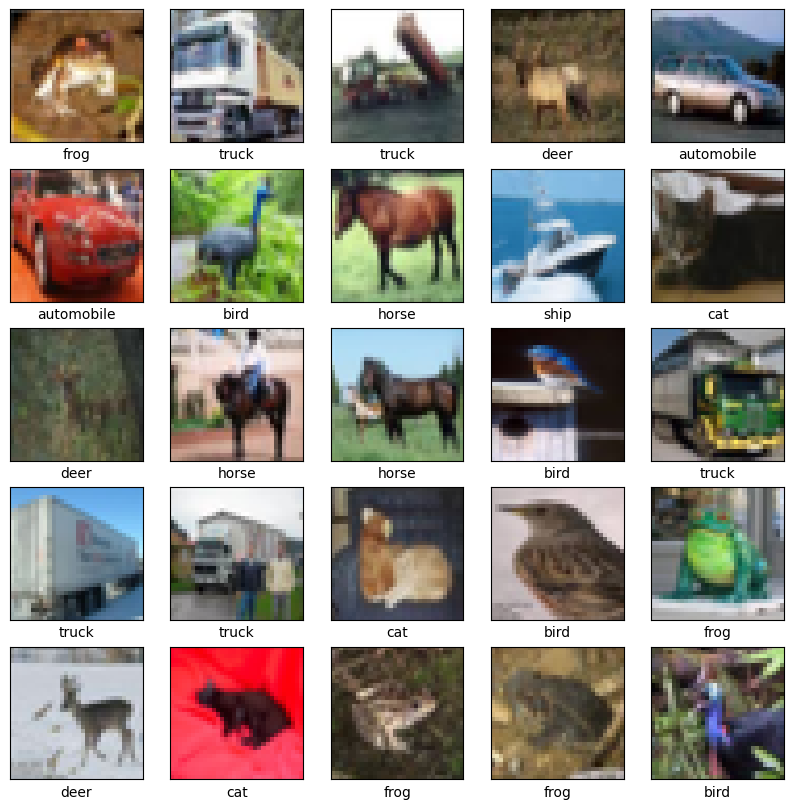

In [5]:
#visualizations
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
#Convert the labels to one-hot encoded form.
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [7]:
print("train_labels shape:", train_labels.shape)
print("test_labels shape:", test_labels.shape)

train_labels shape: (50000, 10)
test_labels shape: (10000, 10)


In [8]:
train_images.shape

(50000, 32, 32, 3)

# Model Architecture

In [9]:
model= keras.Sequential([

    layers.Input(shape=(32,32,3)),
    #Layer 1: Convolutional
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    #Layer 2: Convolutional
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    # MaxPooling Layer
    layers.MaxPooling2D((2, 2)),
    # Dropout Layer
    layers.Dropout(0.3),

    #Layer 3: Convolutional
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    #Layer 4: Convolutional
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    # MaxPooling Layer
    layers.MaxPooling2D((2, 2)),
    # Dropout Layer
    layers.Dropout(0.4),

    #Layer 5: Convolutional
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    #Layer 6: Convolutional
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    # MaxPooling Layer
    layers.MaxPooling2D((2, 2)),
    # Dropout Layer
    layers.Dropout(0.4),

    # Flatten Layer
    layers.Flatten(),
    # Fully Connected Layer
    layers.Dense(512, activation='relu'),
    # Softmax Layer
    layers.Dense(10, activation='softmax')
])

# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [10]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Define Callbacks for Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
batch_size = 100
epochs = 50
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stopping])

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2592 - loss: 1.9683 - val_accuracy: 0.4813 - val_loss: 1.4226
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4914 - loss: 1.3962 - val_accuracy: 0.5590 - val_loss: 1.2033
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5696 - loss: 1.2000 - val_accuracy: 0.6406 - val_loss: 1.0155
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6213 - loss: 1.0617 - val_accuracy: 0.6499 - val_loss: 0.9869
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6537 - loss: 0.9692 - val_accuracy: 0.6939 - val_loss: 0.8636
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6790 - loss: 0.9021 - val_accuracy: 0.7205 - val_loss: 0.7959
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7082 - loss: 0.8318 - val_accuracy: 0.7246 - val_loss: 0.7799
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7241 - loss: 0.7834 - val_accuracy: 0

In [12]:
model.save("cnn_model1.h5")

In [13]:
# Get final training and validation accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

# Get final training and validation loss
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

# Print results
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 0.8818
Final Validation Accuracy: 0.8147
Final Training Loss: 0.3306
Final Validation Loss: 0.5708


# Model Evaluation

* Evaluate the trained model on a separate validation set.
* Compute and report metrics such as accuracy, precision, recall, and F1-score.
* Visualize the confusion matrix to understand model performance across different classes.


In [14]:
#load model
model = keras.models.load_model("cnn_model1.h5")

In [15]:
#Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8228 - loss: 0.5404
Test Accuracy: 0.8164


In [16]:
# Predict class probabilities
y_pred_prob = model.predict(test_images)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [17]:
#Compute and report metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.8164
Precision: 0.8170
Recall: 0.8164
F1-score: 0.8155


In [18]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.89      0.93      0.91      1000
           2       0.81      0.70      0.75      1000
           3       0.68      0.61      0.65      1000
           4       0.81      0.78      0.79      1000
           5       0.68      0.79      0.73      1000
           6       0.82      0.88      0.85      1000
           7       0.84      0.87      0.85      1000
           8       0.90      0.88      0.89      1000
           9       0.92      0.87      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



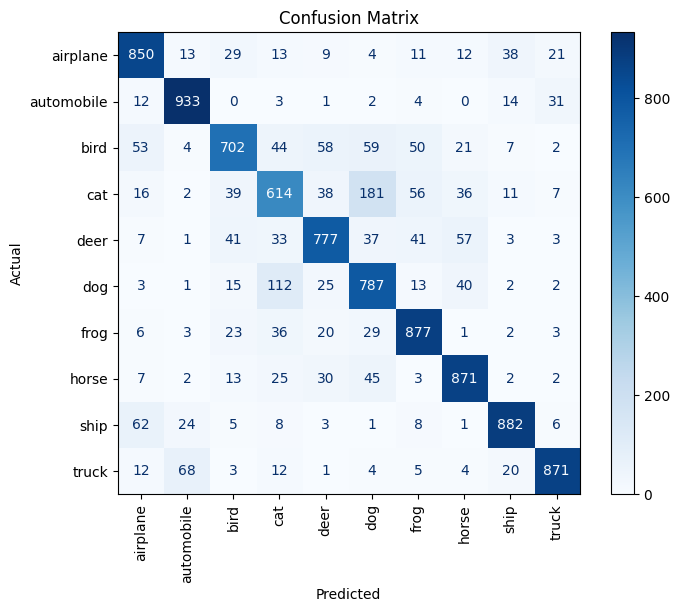

In [19]:
#Visualize the confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(xticks_rotation='vertical', ax=ax,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

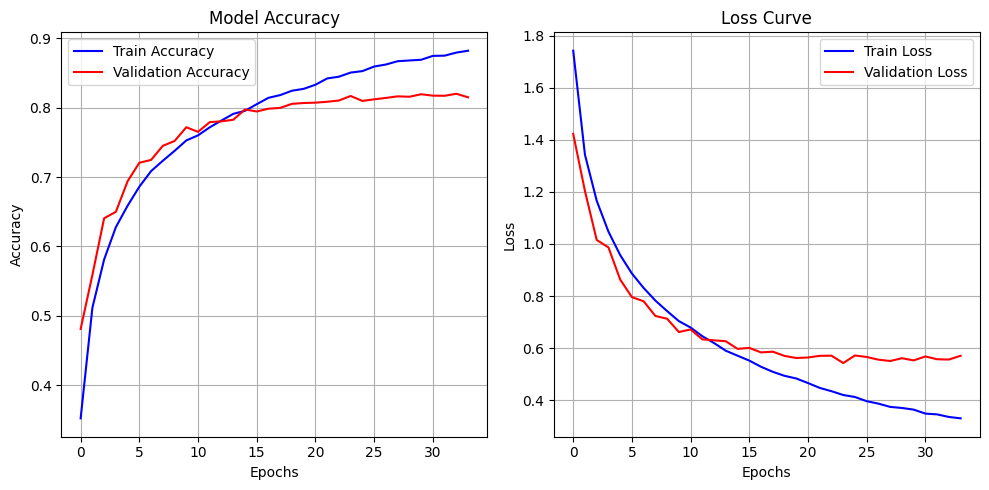

In [20]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

axs[0].plot(history.history['accuracy'], label='Train Accuracy',color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy',color='red')
axs[0].legend()
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].grid(True);


# Plot training & validation loss
axs[1].plot(history.history['loss'], label='Train Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True);

plt.tight_layout()
plt.show()


# Model 2:

## Model Architecture

In [30]:
second_model= keras.Sequential([

    layers.Input(shape=(32,32,3)),
    #Layer 1: Convolutional
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    #Layer 2: Convolutional
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    # MaxPooling Layer
    layers.MaxPooling2D((2, 2)),
    # Dropout Layer
    layers.Dropout(0.3),

    #Layer 3: Convolutional
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    #Layer 4: Convolutional
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    # MaxPooling Layer
    layers.MaxPooling2D((2, 2)),
    # Dropout Layer
    layers.Dropout(0.4),

    #Layer 5: Convolutional
    layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001) ),
    #Layer 6: Convolutional
    layers.Conv2D(128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    # MaxPooling Layer
    layers.MaxPooling2D((2, 2)),
    # Dropout Layer
    layers.Dropout(0.5),

    # Flatten Layer
    layers.Flatten(),
    # Fully Connected Layer
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    # Softmax Layer
    layers.Dense(10, activation='softmax')
])

# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,356 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Model Training

In [31]:
second_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
# Define Callbacks for Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
batch_size = 64
epochs = 50
history2 = second_model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stopping])

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.3296 - loss: 2.4951 - val_accuracy: 0.5072 - val_loss: 1.8039
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5681 - loss: 1.6245 - val_accuracy: 0.5876 - val_loss: 1.6051
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6493 - loss: 1.3460 - val_accuracy: 0.6295 - val_loss: 1.4042
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6932 - loss: 1.2166 - val_accuracy: 0.6920 - val_loss: 1.2288
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7165 - loss: 1.1501 - val_accuracy: 0.6970 - val_loss: 1.2199
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7325 - loss: 1.1063 - val_accuracy: 0.6428 - val_loss: 1.3540
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7421 - loss: 1.0844 - val_accuracy: 0.7412 - val_loss: 1.0999
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7532 - loss: 1.0612 - val_accuracy: 

In [37]:
model.save("second_model.h5")

In [33]:
final_train_acc = history2.history['accuracy'][-1]
final_val_acc = history2.history['val_accuracy'][-1]

# Get final training and validation loss
final_train_loss = history2.history['loss'][-1]
final_val_loss = history2.history['val_loss'][-1]

# Print results
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 0.8156
Final Validation Accuracy: 0.8166
Final Training Loss: 0.8541
Final Validation Loss: 0.8558


## Evaluate

In [34]:
# Predict class probabilities
y_pred_prob2 = second_model.predict(test_images)

# Convert probabilities to class labels
y_pred2 = np.argmax(y_pred_prob2, axis=1)
y_true2 = np.argmax(test_labels, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


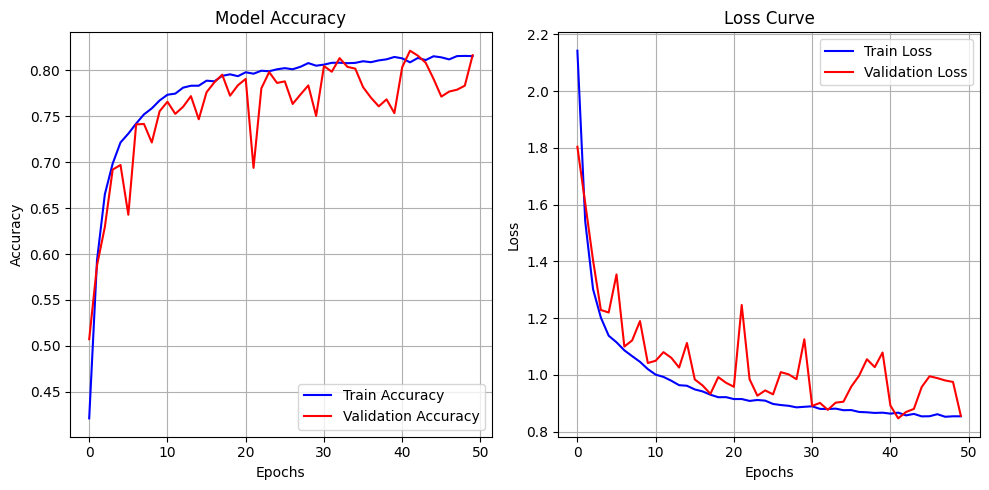

In [35]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(history2.history['accuracy'], label='Train Accuracy',color='blue')
axs[0].plot(history2.history['val_accuracy'], label='Validation Accuracy',color='red')
axs[0].legend()
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].grid(True);


# Plot training & validation loss
axs[1].plot(history2.history['loss'], label='Train Loss', color='blue')
axs[1].plot(history2.history['val_loss'], label='Validation Loss', color='red')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True);

plt.tight_layout()
plt.show()


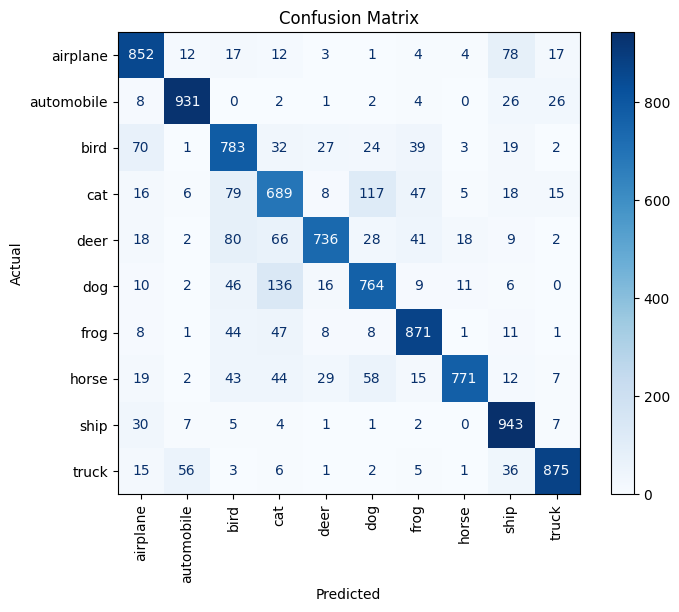

In [36]:
#Visualize the confusion matrix
cm = confusion_matrix(y_true2, y_pred2)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(xticks_rotation='vertical', ax=ax,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
#Compute and report metrics
accuracy2 = accuracy_score(y_true2, y_pred2)
precision2 = precision_score(y_true2, y_pred2, average='weighted')
recall2 = recall_score(y_true2, y_pred2, average='weighted')
f1_second = f1_score(y_true2, y_pred2, average='weighted')

print(f'Accuracy: {accuracy2:.4f}')
print(f'Precision: {precision2:.4f}')
print(f'Recall: {recall2:.4f}')
print(f'F1-score: {f1_second:.4f}')

Accuracy: 0.8215
Precision: 0.8270
Recall: 0.8215
F1-score: 0.8219


In [39]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_true2, y_pred2))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.91      0.93      0.92      1000
           2       0.71      0.78      0.75      1000
           3       0.66      0.69      0.68      1000
           4       0.89      0.74      0.80      1000
           5       0.76      0.76      0.76      1000
           6       0.84      0.87      0.86      1000
           7       0.95      0.77      0.85      1000
           8       0.81      0.94      0.87      1000
           9       0.92      0.88      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000

